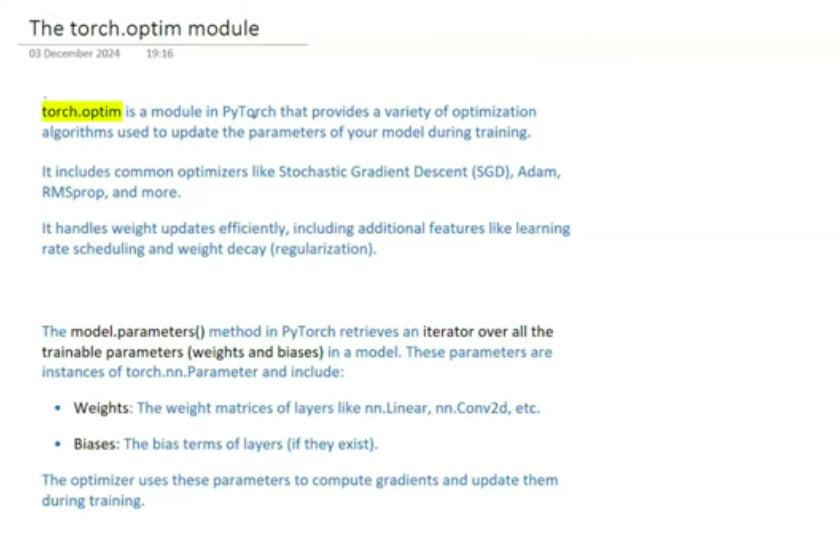

In [2]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [8]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [9]:
import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

# important parameters

In [10]:
learning_rate = 0.1
epochs = 25

In [11]:
# define loss function
loss_function = nn.BCELoss()

In [12]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculate
  loss = loss_function(y_pred, y_train_tensor.view(-1,1))

  # clear gradients
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # parameters update
  optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.6850384473800659
Epoch: 2, Loss: 0.5361238718032837
Epoch: 3, Loss: 0.4531784653663635
Epoch: 4, Loss: 0.3995499610900879
Epoch: 5, Loss: 0.36142125725746155
Epoch: 6, Loss: 0.3326183259487152
Epoch: 7, Loss: 0.30992391705513
Epoch: 8, Loss: 0.29147911071777344
Epoch: 9, Loss: 0.2761270999908447
Epoch: 10, Loss: 0.26310616731643677
Epoch: 11, Loss: 0.2518920600414276
Epoch: 12, Loss: 0.24211075901985168
Epoch: 13, Loss: 0.2334875464439392
Epoch: 14, Loss: 0.2258155196905136
Epoch: 15, Loss: 0.21893568336963654
Epoch: 16, Loss: 0.21272356808185577
Epoch: 17, Loss: 0.20708009600639343
Epoch: 18, Loss: 0.20192547142505646
Epoch: 19, Loss: 0.19719459116458893
Epoch: 20, Loss: 0.19283364713191986
Epoch: 21, Loss: 0.18879790604114532
Epoch: 22, Loss: 0.18504974246025085
Epoch: 23, Loss: 0.18155719339847565
Epoch: 24, Loss: 0.1782931089401245
Epoch: 25, Loss: 0.1752341091632843


In [13]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.571098804473877
